In [1]:
import tensorflow as tf
#Say Thanks To https://github.com/Anupthor007

In [2]:
import matplotlib.pyplot as plt
import seaborn as sn
import math
import datetime
import platform
import numpy as np
import pandas as pd

In [3]:
print("Python version:", platform.python_version())
print("Tensorflow version:", tf.__version__)
#print("Keras version:", ks.keras__version__)

Python version: 3.11.11
Tensorflow version: 2.18.0


In [4]:
#Load the TensorBoard notebook extnsion
#%reload_ext tensorboard
%load_ext tensorboard

In [5]:
%reload_ext tensorboard

In [6]:
!rm -rf ./.logs/

In [7]:
mnist_dataset=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist_dataset.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [10]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

In [11]:
print("IMAGE_WIDTH:", IMAGE_WIDTH);
print("IMAGE_HEIGHT:", IMAGE_HEIGHT);
print("IMAGE_CHANNELS:", IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [15]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


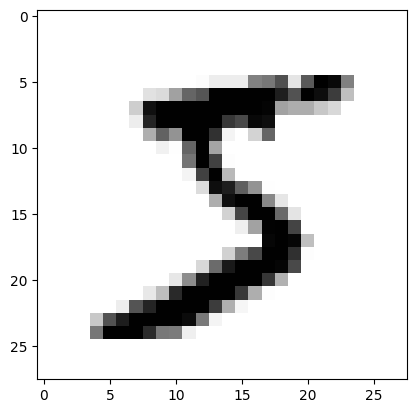

In [16]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

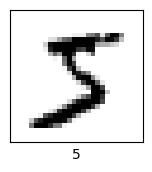

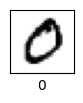

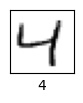

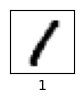

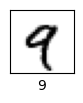

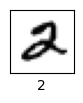

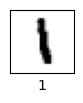

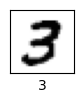

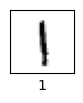

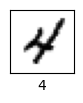

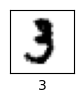

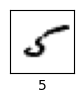

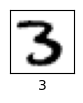

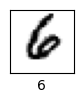

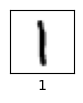

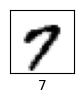

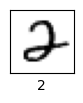

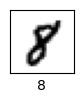

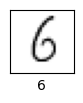

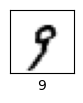

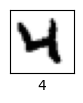

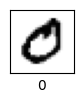

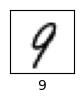

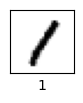

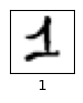

In [18]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
  plt.subplot(num_cells,num_cells, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_train[i])
  plt.show()

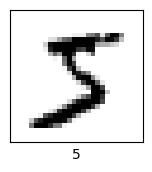

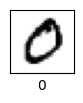

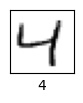

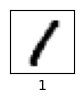

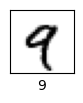

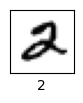

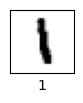

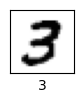

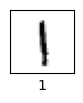

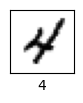

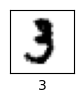

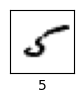

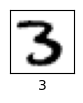

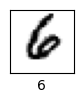

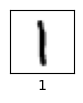

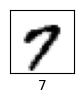

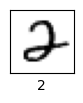

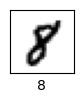

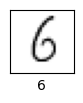

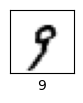

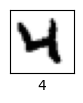

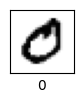

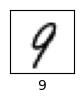

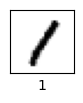

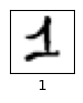

In [19]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
  plt.subplot(num_cells,num_cells, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_train[i])
  plt.show()`

In [24]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [27]:
print('x_train_with_chanels:',x_train_with_chanels.shape)
print('x_test_with_chanels:',x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


In [28]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [29]:
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [43]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
   input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
   kernel_size=5,
   filters=8,
   strides=1,
   activation=tf.keras.activations.relu,
   kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2)
))

model.add(tf.keras.layers.Convolution2D(
kernel_size=5,
filters=16,
strides=1,
activation=tf.keras.activations.relu,
   kernel_initializer=tf.keras.initializers.VarianceScaling()
   ))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
))

model.add(tf.keras.layers.Dropout(0,2))

model.add(tf.keras.layers.Dense(
              len(np.unique(y_train)),
              activation=tf.keras.activations.softmax,
              kernel_initializer=tf.keras.initializers.VarianceScaling()
               ))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 8)           │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 16)            │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,610 (146.91 KB)

 Trainable params: 37,610 (146.91 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
pip install pydot

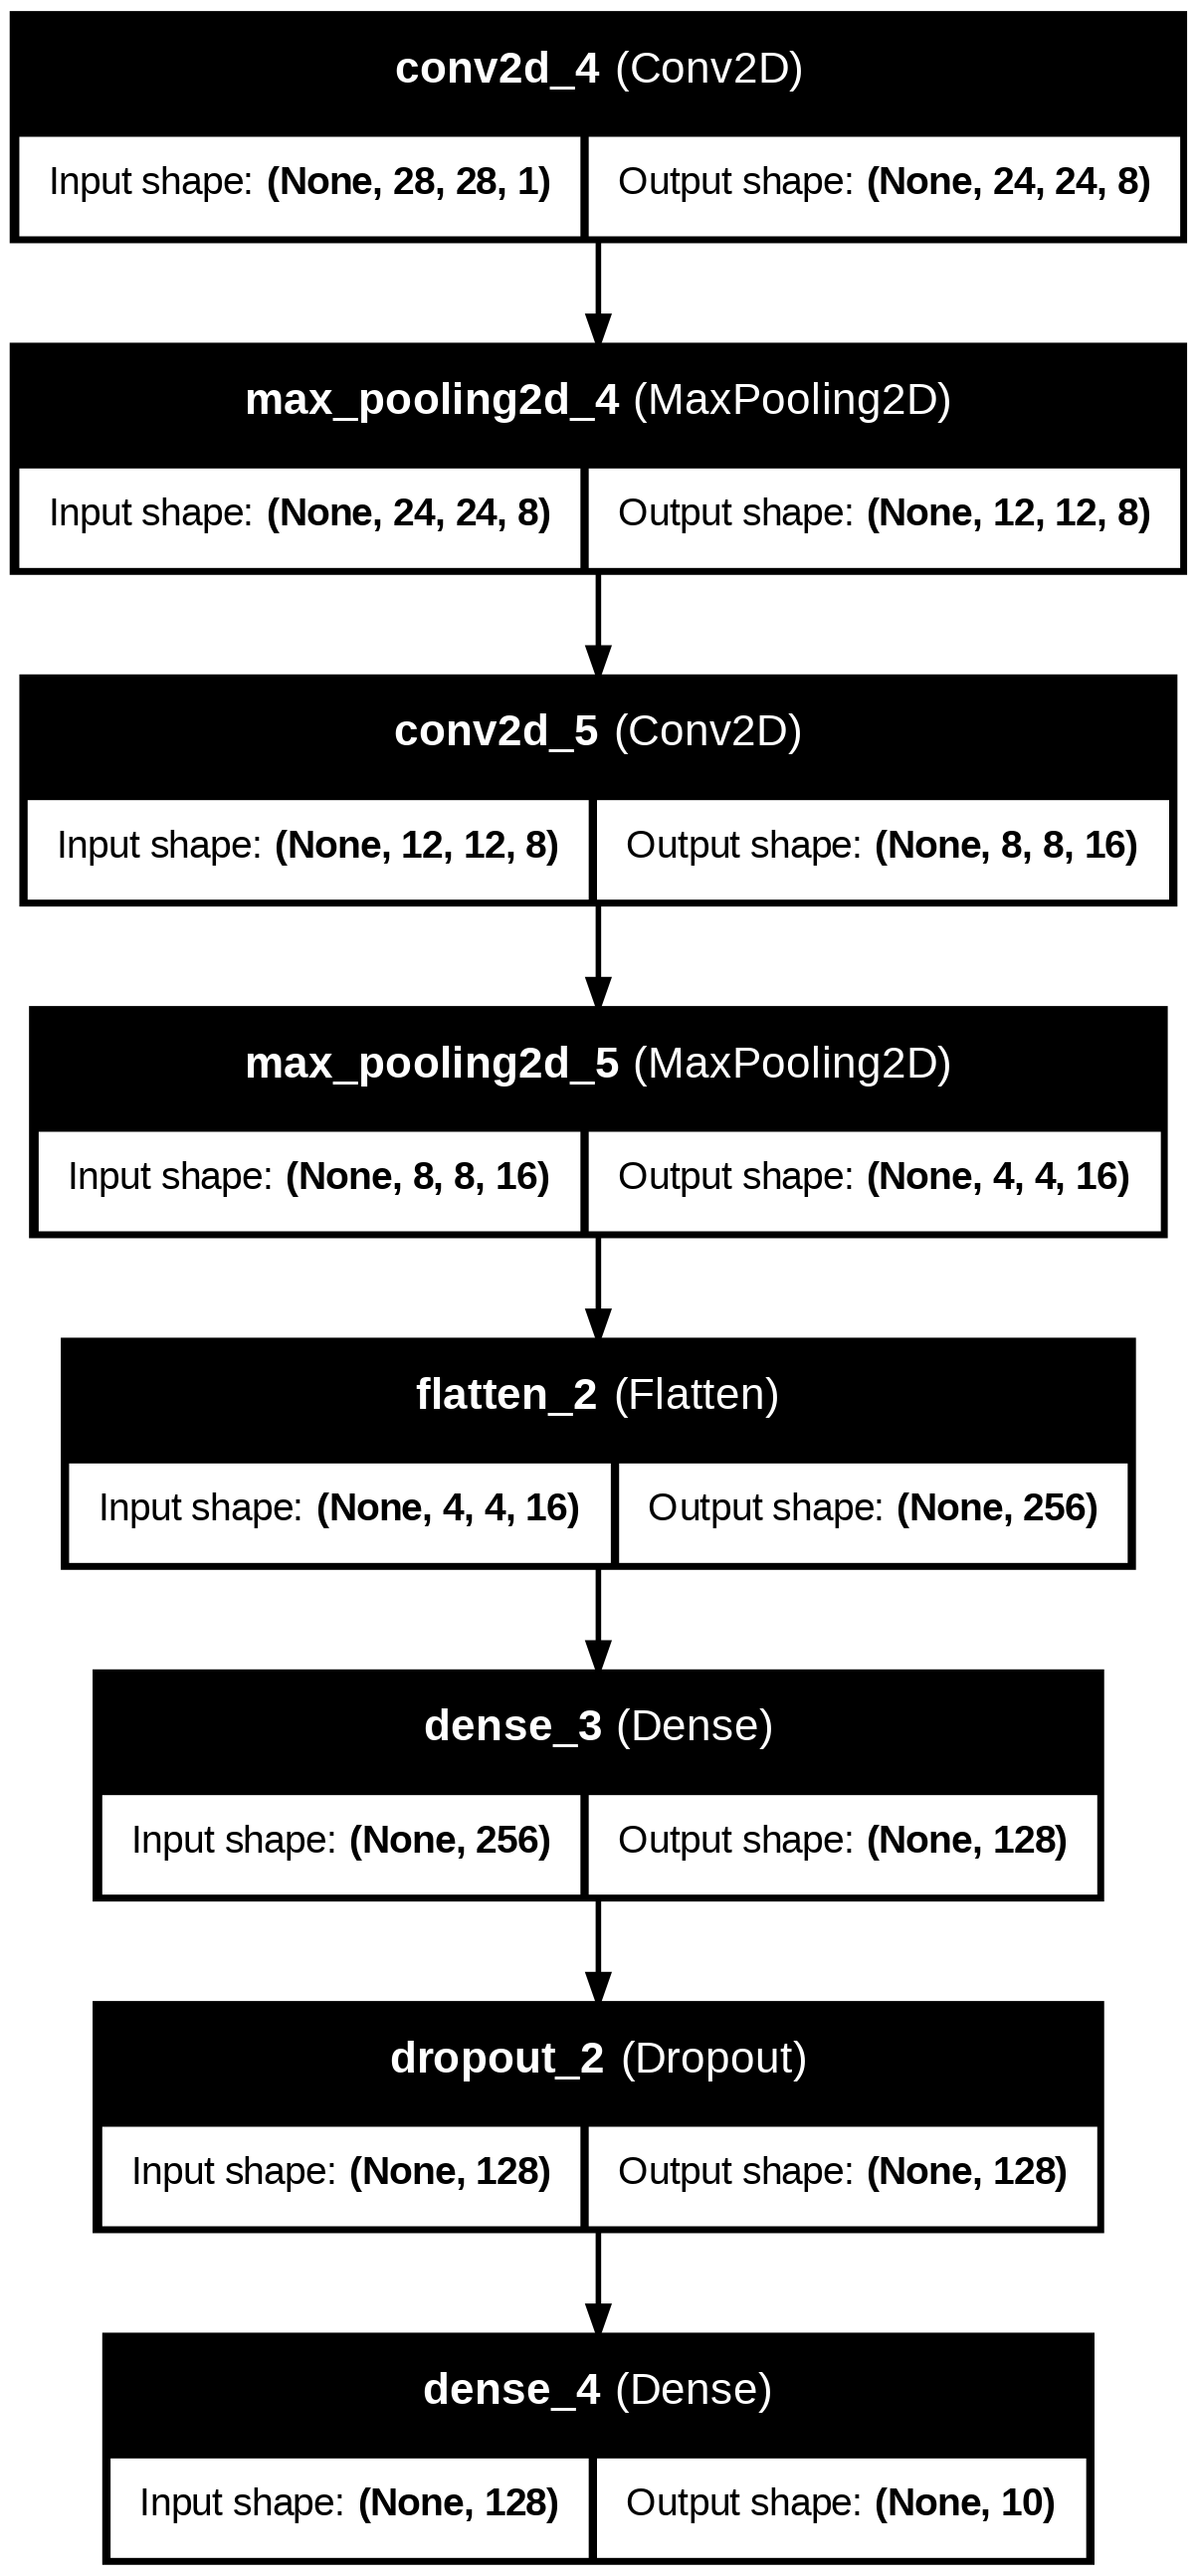

In [46]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)


In [48]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [50]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.8695 - loss: 0.4244 - val_accuracy: 0.9780 - val_loss: 0.0685
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 17ms/step - accuracy: 0.9825 - loss: 0.0580 - val_accuracy: 0.9840 - val_loss: 0.0482
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9881 - loss: 0.0385 - val_accuracy: 0.9886 - val_loss: 0.0349
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9908 - loss: 0.0301 - val_accuracy: 0.9883 - val_loss: 0.0356
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9922 - loss: 0.0242 - val_accuracy: 0.9894 - val_loss: 0.0327
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9930 - loss: 0.0215 - val_accuracy: 0.9895 - val_loss: 0.0347
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9946 - loss: 0.0160 - val_accuracy: 0.9899 - val_loss: 0.0334
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9956 -

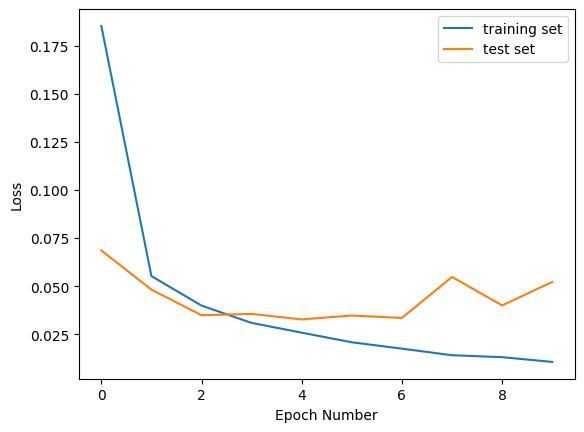

In [51]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

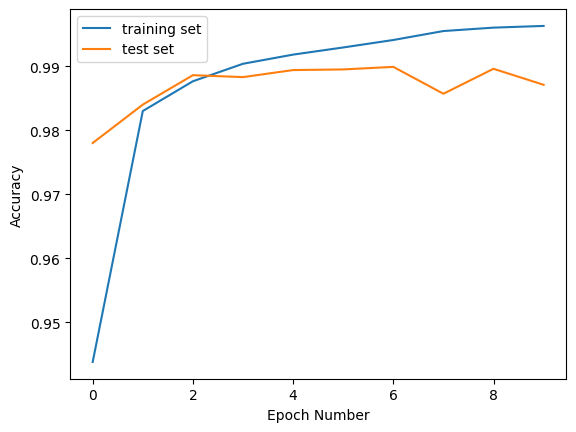

In [52]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

In [53]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [54]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.010245605371892452
Training accuracy:  0.996833324432373


In [57]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)


In [58]:
print('Validation loss:', validation_loss)
print('Validation accuracy:', validation_accuracy)

Validation loss: 0.05216027796268463
Validation accuracy: 0.9871000051498413


In [59]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [60]:
loaded_model = tf.keras.models.load_model(model_name)

In [61]:
predictions_one_hot= loaded_model.predict(x_test_normalized)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [62]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [63]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,7.426359e-14,2.189262e-13,4.073824e-09,1.304877e-05,3.974114e-09,2.767264e-10,4.684581e-20,9.999865e-01,3.311117e-09,4.969581e-07
1,4.331295e-10,8.218383e-10,9.999999e-01,3.760947e-11,5.025816e-11,2.478762e-14,2.759600e-10,4.587293e-12,3.893555e-13,1.313294e-12
2,2.298255e-08,9.999934e-01,1.023593e-07,5.084014e-12,3.295606e-07,1.895189e-06,9.323691e-07,1.664940e-06,1.489066e-06,4.063184e-08
3,9.999999e-01,1.554522e-18,1.009585e-13,6.999261e-15,7.257106e-19,2.161880e-12,3.865853e-11,4.450403e-18,4.327589e-13,7.077650e-14
4,3.602306e-11,1.293318e-11,1.922216e-10,1.232046e-13,9.999996e-01,2.680580e-13,3.635458e-11,1.203437e-12,2.138561e-08,3.374334e-07
...,...,...,...,...,...,...,...,...,...,...
9995,4.924517e-16,2.280963e-12,9.999999e-01,1.685151e-09,3.048277e-14,1.853165e-20,1.483013e-17,1.503294e-09,5.388492e-14,4.129760e-17
9996,1.398275e-11,1.322500e-11,2.312168e-12,9.999998e-01,3.093885e-17,1.804649e-08,4.245927e-16,1.648589e-15,2.364866e-11,9.881405e-08
9997,4.218018e-14,2.473907e-09,4.393853e-12,7.038245e-14,9.999996e-01,2.488317e-13,1.635634e-11,1.360661e-09,3.151662e-07,1.124809e-09
9998,7.813971e-12,1.634859e-17,2.978768e-24,6.584570e-08,1.108315e-22,9.999998e-01,2.461072e-14,6.519072e-24,1.347545e-11,1.264084e-15


In [65]:
predictions= np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


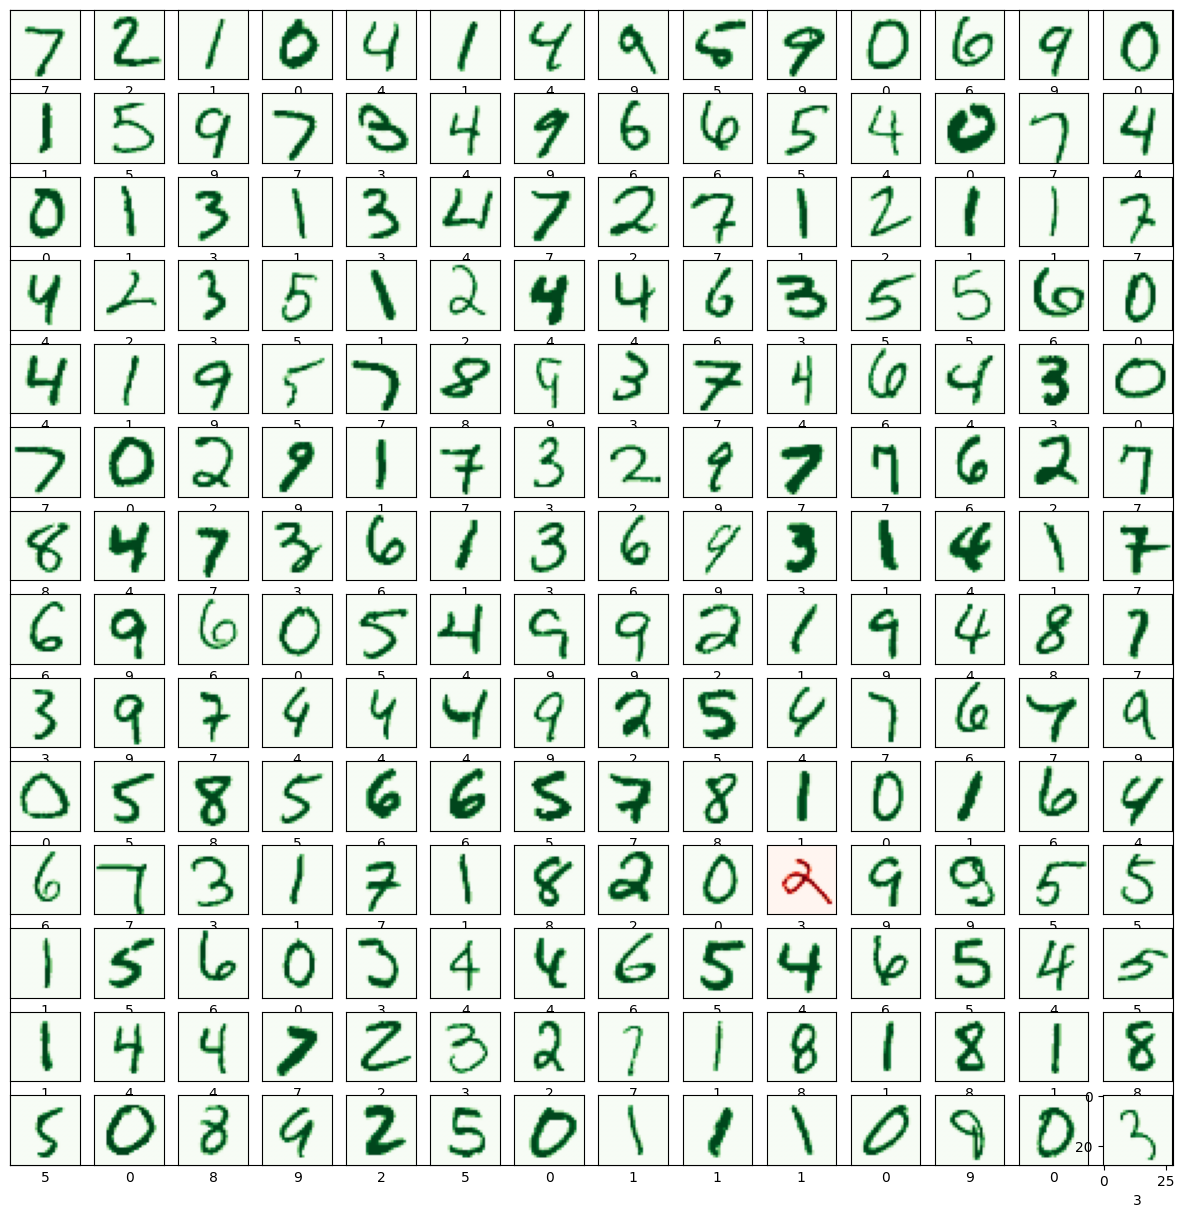

In [66]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map='Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.show()